In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import scipy.sparse as sp
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv('../../heart.csv')
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<BarContainer object of 2 artists>

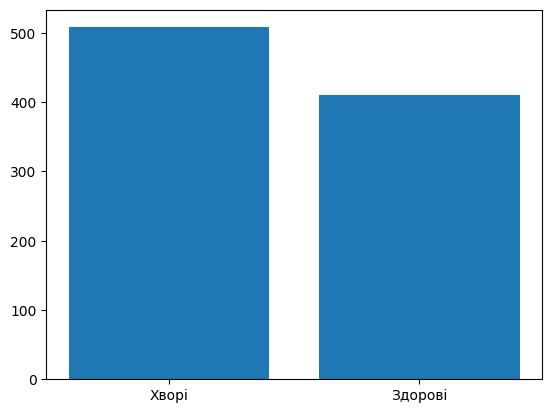

In [ ]:
sick_count = df[df['HeartDisease'] == 1].shape[0]
healthy_count = df[df['HeartDisease'] == 0].shape[0]
plt.bar(['Хворі', 'Здорові'], [sick_count, healthy_count])

In [ ]:
#Розділяємо дані на ознаки (features) та цільову змінну (target)
y = df.pop('HeartDisease')
X = df

In [ ]:

# Кодуємо категоріальні ознаки у формат one-hot encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])

# Нормалізація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']))

# Об'єднання закодованих категоріальних та нормалізованих числових ознак
X_final_array = np.hstack((X_encoded.toarray(), X_scaled))

# Розділяємо дані на навчальний та тестовий набори зі збалансованим співвідношенням класів
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in splitter.split(X_final_array, y):
    X_train, X_test = X_final_array[train_index], X_final_array[test_index]
    y_train, y_test = y[train_index], y[test_index]


#
# scaler = StandardScaler()
# X_final_scaled = scaler.fit_transform(X_final_array)

In [ ]:
# Оголошуємо модель
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_final_array.shape[1],), activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Виведемо результати
print(model.summary())

Epoch 1/50
19/19 [==============================] - 2s 10ms/step - loss: 0.6355 - accuracy: 0.7189 - val_loss: 0.5779 - val_accuracy: 0.8231
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5136 - accuracy: 0.8143 - val_loss: 0.5186 - val_accuracy: 0.8095
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4455 - accuracy: 0.8467 - val_loss: 0.4874 - val_accuracy: 0.8163
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8552 - val_loss: 0.4721 - val_accuracy: 0.8163
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3799 - accuracy: 0.8552 - val_loss: 0.4649 - val_accuracy: 0.8095
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3640 - accuracy: 0.8535 - val_loss: 0.4611 - val_accuracy: 0.8027
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8654 - val_loss: 0.4579 - val_accuracy: 0.8027
Epoch 8/50
19/19 [=

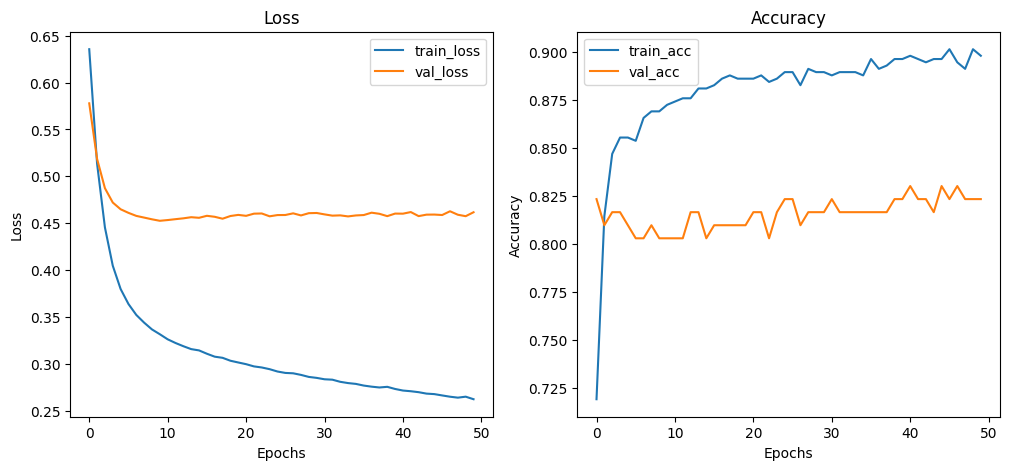

Точність моделі на тестових даних: 86.96%


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Оцінюємо точність моделі на тестових даних
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Точність моделі на тестових даних: {:.2f}%".format(test_accuracy * 100))